### Project 3 Ordinary Differential Equations in Orbital Mechanics for Two Body Problem

## The Solution below does not use ODE's

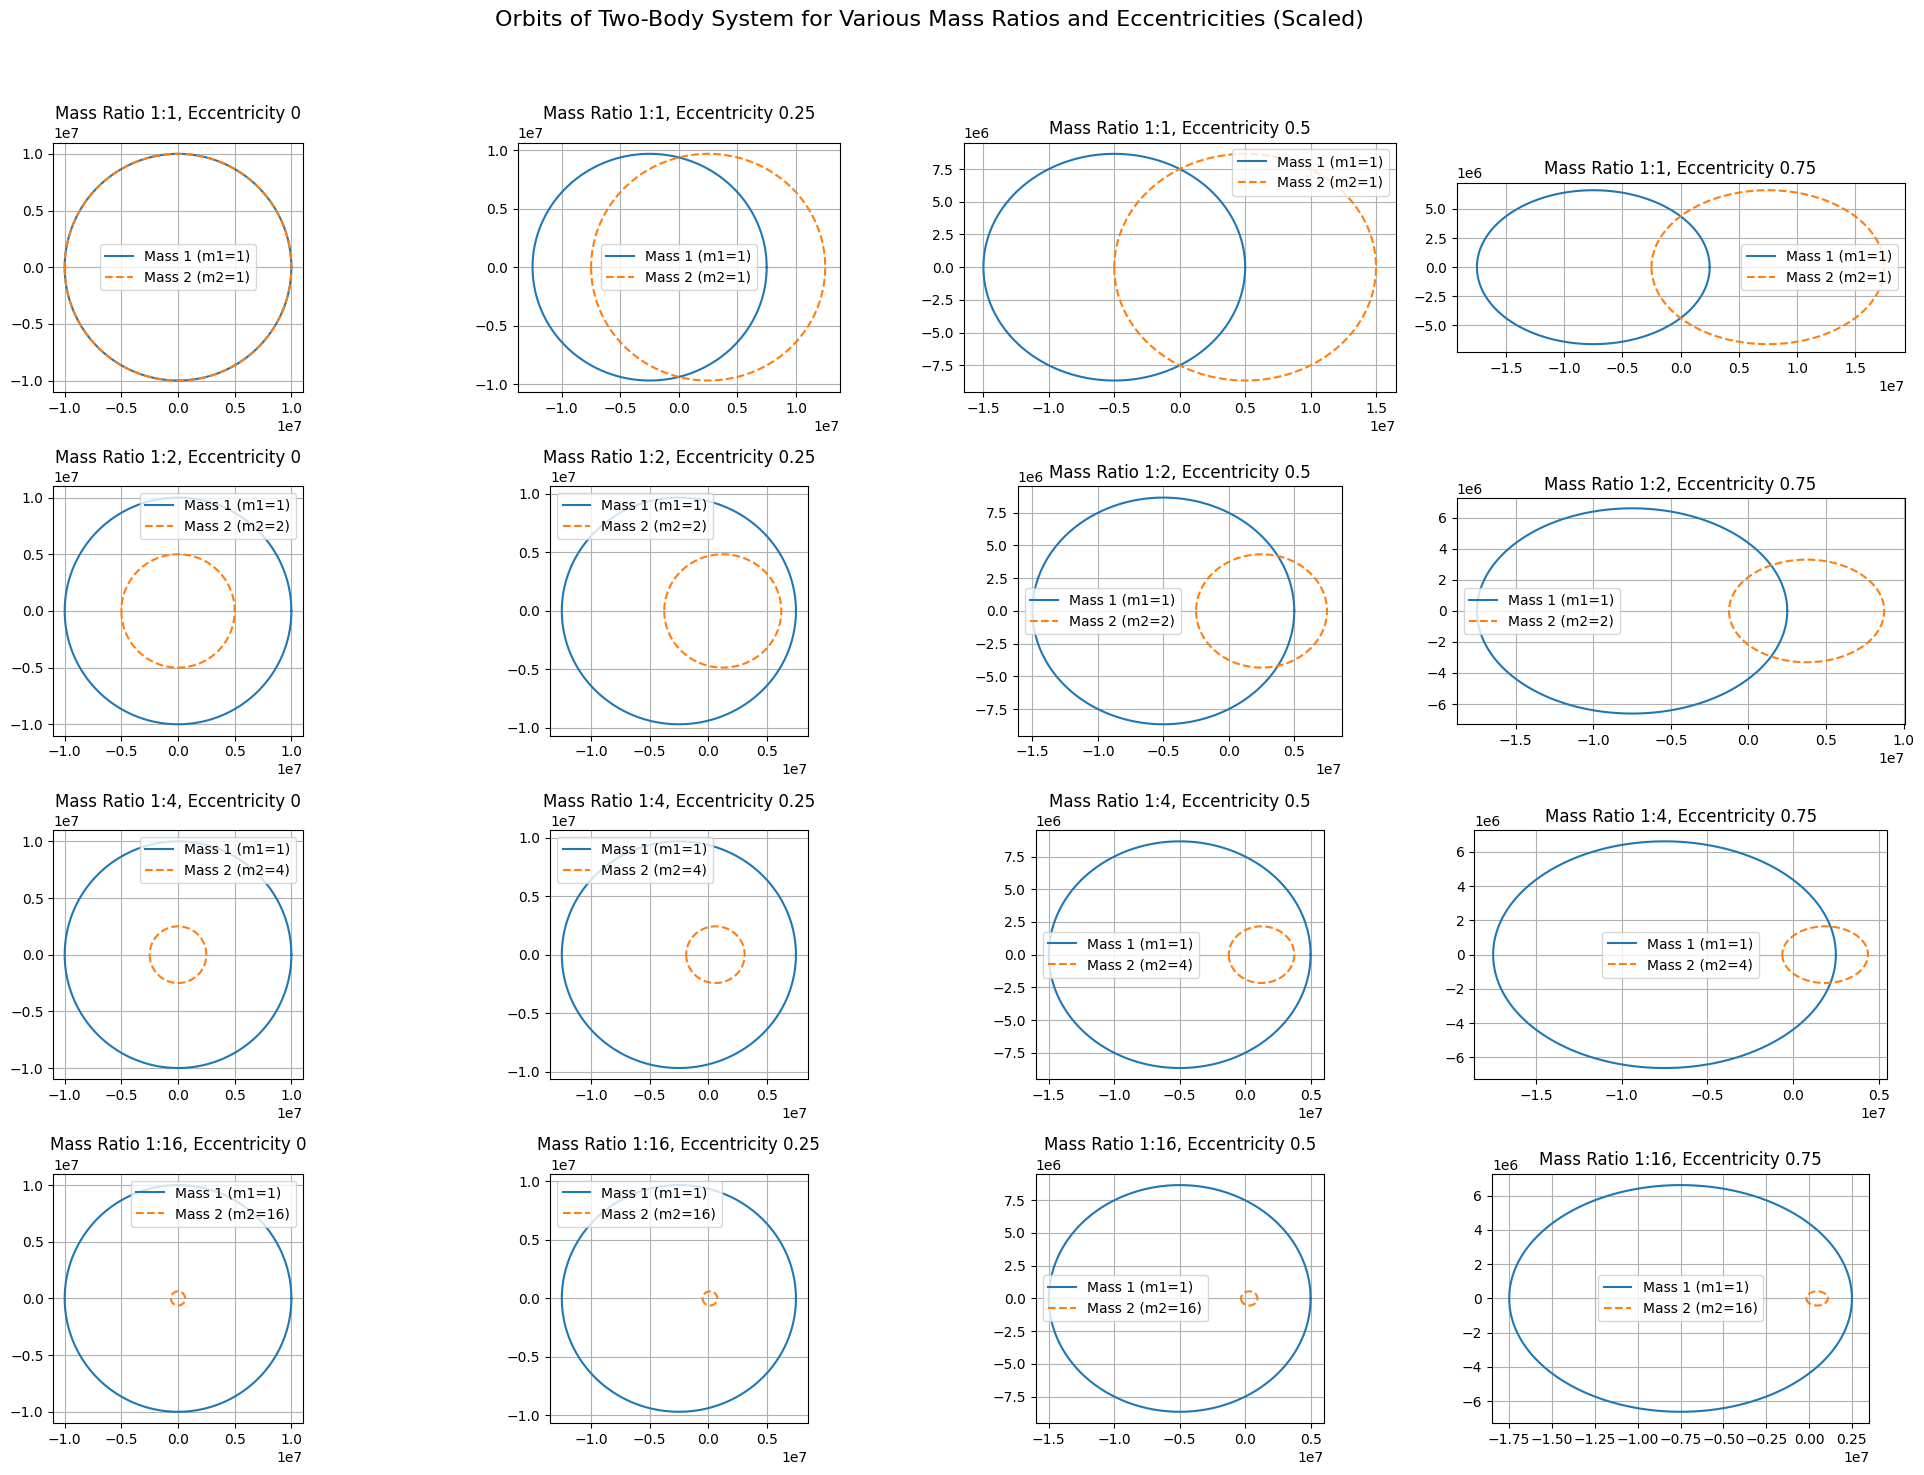

In [15]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Actual gravitational constant in m^3 kg^-1 s^-2
G = 6.67430e-11
mass_ratios = [(1, 1), (1, 2), (1, 4), (1, 16)]
eccentricities = [0, 0.25, 0.5, 0.75]


# Adjusted function to account for scaling with the actual gravitational constant
def calculate_orbit_realistic(m1, m2, e, a=1e7, num_points=1000):
    # Parametric angle
    theta = np.linspace(0, 2 * np.pi, num_points)
    
    # Orbital equations for an elliptical orbit
    r1 = a * (1 - e**2) / (1 + e * np.cos(theta))
    r2 = (m1 / m2) * r1  # Proportional distance for the second body
    
    x1 = r1 * np.cos(theta)
    y1 = r1 * np.sin(theta)
    x2 = -r2 * np.cos(theta)
    y2 = -r2 * np.sin(theta)
    
    return x1, y1, x2, y2


# Plotting with actual G and scaled semi-major axis
fig, axes = plt.subplots(len(mass_ratios), len(eccentricities), figsize=(20, 15))
fig.suptitle('Orbits of Two-Body System for Various Mass Ratios and Eccentricities (Scaled)', fontsize=16)

for i, (m1, m2) in enumerate(mass_ratios):
    for j, e in enumerate(eccentricities):
        x1, y1, x2, y2 = calculate_orbit_realistic(m1, m2, e)
        
        ax = axes[i, j]
        ax.plot(x1, y1, label=f'Mass 1 (m1={m1})')
        ax.plot(x2, y2, label=f'Mass 2 (m2={m2})', linestyle='--')
        
        ax.set_title(f'Mass Ratio {m1}:{m2}, Eccentricity {e}')
        ax.set_aspect('equal', 'box')
        ax.legend()
        ax.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


## This method uses ODE RK4,5 method

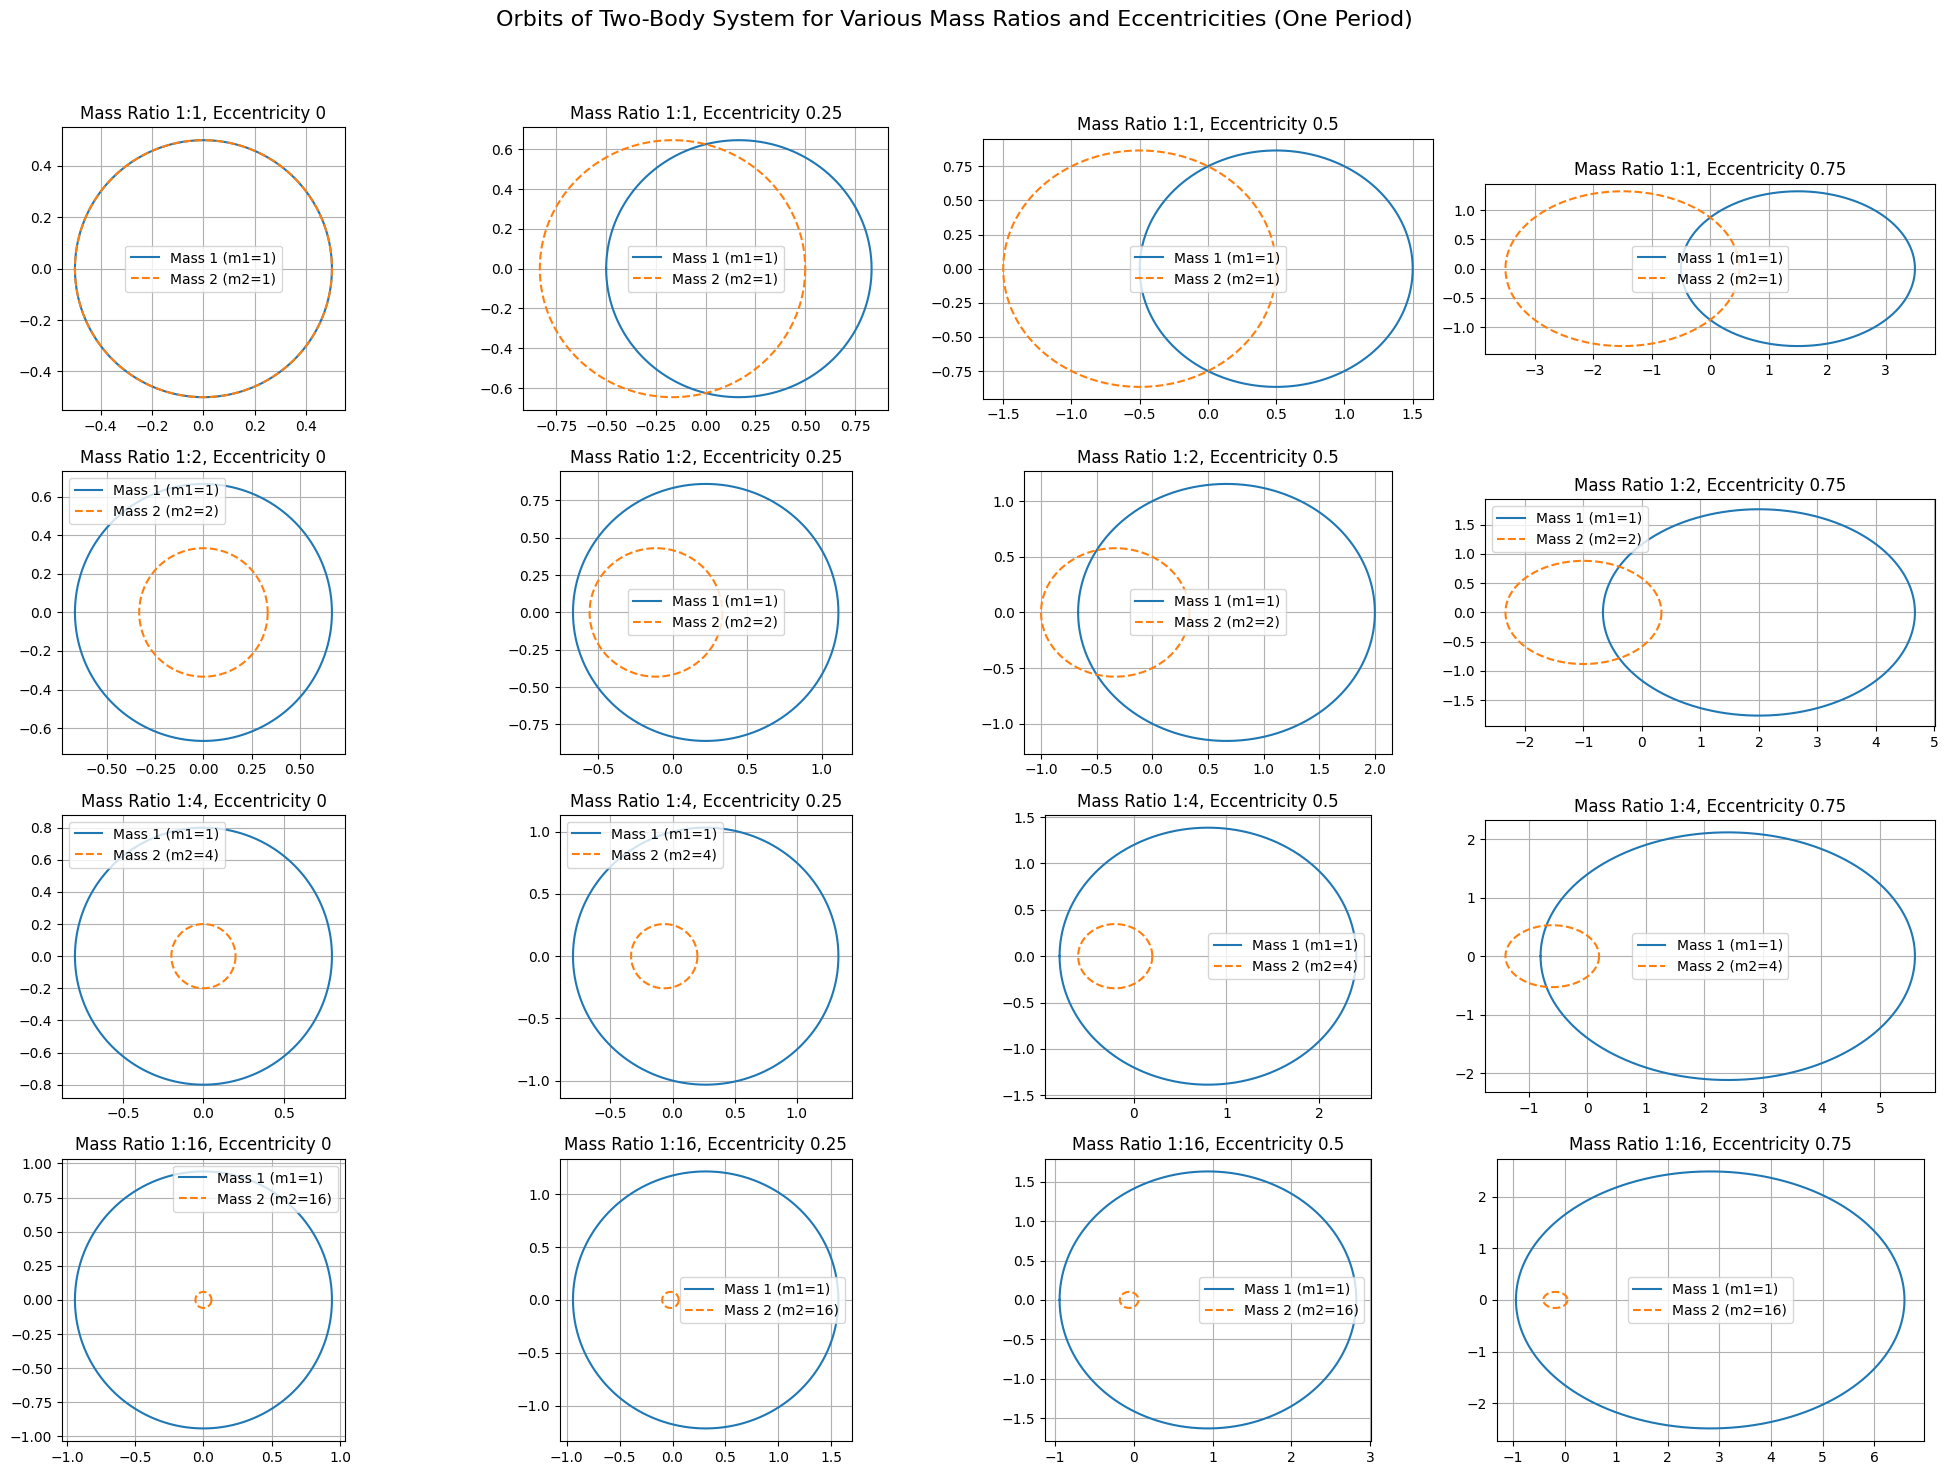

In [14]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Define the ODE system for the two-body problem in scaled units
def orbit_system(t, state):
    x, y, vx, vy = state
    r = np.sqrt(x**2 + y**2)
    ax = -x / r**3
    ay = -y / r**3
    return [vx, vy, ax, ay]

# Initial setup
mass_ratios = [(1, 1), (1, 2), (1, 4), (1, 16)]
eccentricities = [0, 0.25, 0.5, 0.75]

# Plot setup
fig, axes = plt.subplots(len(mass_ratios), len(eccentricities), figsize=(20, 15))
fig.suptitle('Orbits of Two-Body System for Various Mass Ratios and Eccentricities (One Period)', fontsize=16)

# Loop through configurations
for i, (m1, m2) in enumerate(mass_ratios):
    for j, e in enumerate(eccentricities):
        # Calculate the period for the given eccentricity
        T = 2 * np.pi / (1 - e)**1.5  # Period for one orbit
        
        # Time span for one period with a slight extension
        t_span = (0, T * (1 + 1e-6))
        t_eval = np.linspace(0, T, 5000)  # Increase the number of points for better precision
        
        # Initial conditions
        x0, y0 = -1, 0
        vx0, vy0 = 0, np.sqrt(1 + e)
        initial_conditions = [x0, y0, vx0, vy0]
        
        # Solve the system with higher precision
        solution = solve_ivp(
            orbit_system, 
            t_span, 
            initial_conditions, 
            t_eval=t_eval, 
            method='RK45', 
            rtol=1e-9, 
            atol=1e-12
        )
        
        # Extract solutions
        x_rel, y_rel = solution.y[0], solution.y[1]
        
        # Check if the final position matches the initial position
        x_final, y_final = x_rel[-1], y_rel[-1]
        if not (np.isclose(x_final, x0, atol=1e-3) and np.isclose(y_final, y0, atol=1e-3)):
            print(f"Warning: Orbit did not close for mass ratio {m1}:{m2} and eccentricity {e}.")
        
        # Calculate positions of m1 and m2 in the center-of-mass frame
        x1 = (m2 / (m1 + m2)) * x_rel
        y1 = (m2 / (m1 + m2)) * y_rel
        x2 = -(m1 / (m1 + m2)) * x_rel
        y2 = -(m1 / (m1 + m2)) * y_rel
        
        # Plot the orbits
        ax = axes[i, j]
        ax.plot(x1, y1, label=f'Mass 1 (m1={m1})')
        ax.plot(x2, y2, label=f'Mass 2 (m2={m2})', linestyle='--')
        ax.set_title(f'Mass Ratio {m1}:{m2}, Eccentricity {e}')
        ax.set_aspect('equal', 'box')
        ax.legend()
        ax.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
